In [1]:
# Import Library
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import seaborn as sns
import joblib

In [2]:
# Read csv
df = pd.read_csv('https://raw.githubusercontent.com/StuntShield/stunt-shield-food-recommender-model/main/dataset/dataset.csv')

# Display the first few rows of the DataFrame
print(df.head())

  NDB_No                Descrip  Energy_kcal  Protein_g  Saturated_fats_g  \
0   1001       butter with salt        717.0       0.85            51.368   
1   1002  butter whipped w salt        718.0       0.49            45.390   
2   1003   butter oil anhydrous        876.0       0.28            61.924   
3   1004            cheese blue        353.0      21.40            18.669   
4   1005           cheese brick        371.0      23.24            18.764   

   Fat_g  Carb_g  Fiber_g  Sugar_g  Calcium_mg  ...  VitC_mg Thiamin_mg  \
0  81.11    0.06      0.0     0.06        24.0  ...      0.0      0.005   
1  78.30    2.87      0.0     0.06        23.0  ...      0.0      0.007   
2  99.48    0.00      0.0     0.00         4.0  ...      0.0      0.001   
3  28.74    2.34      0.0     0.50       528.0  ...      0.0      0.029   
4  29.68    2.79      0.0     0.51       674.0  ...      0.0      0.014   

   Riboflavin_mg  Niacin_mg  VitB6_mg  Folate_mcg  VitB12_mcg  VitA_mcg  \
0          

In [3]:
df.isnull().any().value_counts()

False    29
Name: count, dtype: int64

In [4]:
df.duplicated().value_counts()

False    9318
Name: count, dtype: int64

In [5]:
pattern = '[0-9]*.[0-9]\\s|[^0-9.]'
matches_mag = df.Magnesium_mg.str.contains(pattern, regex=True, case=False)
matches_mag.value_counts()

Magnesium_mg
False    9317
True        1
Name: count, dtype: int64

In [6]:
df.loc[matches_mag].loc[:, 'Magnesium_mg']

9242    X
Name: Magnesium_mg, dtype: object

In [7]:
matches_vit = df.VitE_mg.str.contains(pattern, regex=True, case=False)
df.loc[matches_vit]

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
9195,O058,hare shoulder,144.117,21.13,2.698,6.58,0.0,0.0,0.0,57.51,...,0.0,0.07,0.27,5.04,0.28,2.20,0.0,0.0,0.58 1.46,0.0
9196,O059,hare chops,106.355,20.62,1.028,2.55,0.0,0.0,0.0,38.36,...,0.0,0.07,0.28,4.85,0.22,3.85,0.0,0.0,0.69 1.73,0.0
9197,O060,hare leg,120.217,20.52,0.910,4.16,0.0,0.0,0.0,53.02,...,0.0,0.08,0.22,5.63,0.24,1.95,0.0,0.0,0.58 1.44,0.0
9198,O061,rabbit shoulder,151.765,20.01,3.142,7.96,0.0,0.0,0.0,46.37,...,0.0,0.03,0.14,4.38,0.30,1.80,0.0,0.0,0.49 1.22,0.0
9199,O062,rabbit chops,135.035,22.61,1.907,4.88,0.0,0.0,0.0,25.48,...,0.0,0.02,0.08,7.54,0.24,2.10,0.0,0.0,0.33 0.83,0.0
9200,O063,rabbit leg,139.576,21.31,1.575,5.99,0.0,0.0,0.0,22.31,...,0.0,0.03,0.10,5.02,0.26,1.80,0.0,0.0,0.29 0.72,0.0


In [8]:
df.loc[matches_vit | matches_mag]

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
9195,O058,hare shoulder,144.117,21.13,2.698,6.58,0.0,0.0,0.0,57.51,...,0.0,0.07,0.27,5.04,0.28,2.20,0.0,0.0,0.58 1.46,0.0
9196,O059,hare chops,106.355,20.62,1.028,2.55,0.0,0.0,0.0,38.36,...,0.0,0.07,0.28,4.85,0.22,3.85,0.0,0.0,0.69 1.73,0.0
9197,O060,hare leg,120.217,20.52,0.910,4.16,0.0,0.0,0.0,53.02,...,0.0,0.08,0.22,5.63,0.24,1.95,0.0,0.0,0.58 1.44,0.0
9198,O061,rabbit shoulder,151.765,20.01,3.142,7.96,0.0,0.0,0.0,46.37,...,0.0,0.03,0.14,4.38,0.30,1.80,0.0,0.0,0.49 1.22,0.0
9199,O062,rabbit chops,135.035,22.61,1.907,4.88,0.0,0.0,0.0,25.48,...,0.0,0.02,0.08,7.54,0.24,2.10,0.0,0.0,0.33 0.83,0.0
9200,O063,rabbit leg,139.576,21.31,1.575,5.99,0.0,0.0,0.0,22.31,...,0.0,0.03,0.10,5.02,0.26,1.80,0.0,0.0,0.29 0.72,0.0
9242,P042,nalla bontha,86.996,19.82,0.238,0.72,0.0,0.0,0.0,9.04,...,0.0,0.04,0.01,0.56,83.41,1714.00,0.0,0.0,0.9,0.0


In [9]:
df.drop(df.loc[matches_mag | matches_vit].index, inplace=True)
df.loc[matches_vit | matches_mag]

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg


#EDA

In [10]:
df

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
0,1001,butter with salt,717.000,0.85,51.36800,81.11,0.06,0.0,0.06,24.00,...,0.0,0.005,0.034,0.042,0.003,3.0,0.17,684.0,2.32,0.0
1,1002,butter whipped w salt,718.000,0.49,45.39000,78.30,2.87,0.0,0.06,23.00,...,0.0,0.007,0.064,0.022,0.008,4.0,0.07,683.0,1.37,0.0
2,1003,butter oil anhydrous,876.000,0.28,61.92400,99.48,0.00,0.0,0.00,4.00,...,0.0,0.001,0.005,0.003,0.001,0.0,0.01,840.0,2.8,0.0
3,1004,cheese blue,353.000,21.40,18.66900,28.74,2.34,0.0,0.50,528.00,...,0.0,0.029,0.382,1.016,0.166,36.0,1.22,198.0,0.25,0.5
4,1005,cheese brick,371.000,23.24,18.76400,29.68,2.79,0.0,0.51,674.00,...,0.0,0.014,0.351,0.118,0.065,20.0,1.26,292.0,0.26,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,S006,rohu,102.292,19.71,2.04700,2.39,0.00,0.0,0.00,39.37,...,0.0,0.000,0.040,2.330,240.000,1263.0,0.00,0.0,2.4,0.0
9314,S007,crab,78.153,13.23,0.21400,0.89,0.00,0.0,0.00,199.00,...,0.0,0.010,0.110,1.540,202.000,1783.0,0.00,0.0,4.85,0.0
9315,S008,prawns big,90.820,19.24,0.08686,0.52,0.00,0.0,0.00,48.55,...,0.0,0.000,0.020,1.310,186.000,1826.0,0.00,0.0,0,0.0
9316,S009,prawns small,70.983,13.07,0.19700,0.78,0.00,0.0,0.00,67.99,...,0.0,0.010,0.030,0.540,207.000,1306.0,0.00,0.0,1.75,0.0


In [11]:
df.describe()

,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,Iron_mg,Phosphorus_mg,...,Selenium_mcg,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitD2_mcg
count,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,...,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000
mean,220.968805,11.314473,3.306599,10.206345,21.520262,2.151426,6.527797,73.655052,2.665231,154.483466,...,12.905578,8.641603,0.201621,0.226651,3.299695,1.892777,36.491889,1.136141,89.200418,0.344139
std,169.077023,10.438662,6.300781,15.580578,27.001992,4.454334,13.500564,198.202253,5.634001,199.047624,...,27.854602,64.170982,0.495069,0.427517,4.648445,15.721772,161.148690,4.159903,750.929699,3.005078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.000000,2.330000,0.135500,0.820000,0.000000,0.000000,0.000000,9.000000,0.490000,36.000000,...,0.100000,0.000000,0.030000,0.042000,0.383000,0.037000,0.000000,0.000000,0.000000,0.000000
50%,183.000000,8.100000,1.318000,4.800000,8.730000,0.400000,0.470000,19.820000,1.300000,131.000000,...,4.300000,0.000000,0.075000,0.145000,2.000000,0.124000,7.000000,0.010000,1.000000,0.000000
75%,331.000000,19.850000,4.000000,13.220000,32.560000,2.500000,5.495000,64.000000,2.595000,216.000000,...,21.500000,2.800000,0.217000,0.253000,4.934500,0.366000,19.000000,1.115000,19.000000,0.000000
max,902.000000,88.320000,95.600000,100.000000,100.000000,79.000000,99.800000,7364.000000,123.600000,9918.000000,...,1917.000000,2732.000000,23.375000,17.500000,127.500000,316.000000,2875.000000,98.890000,30000.000000,250.000000


In [12]:
#hapus yg kalorinya lebih dari 500 karena tidak sehat
high_cal = df.Energy_kcal >= 500
df.drop(df.loc[high_cal].index, inplace=True)
print(df)

     NDB_No           Descrip  Energy_kcal  Protein_g  Saturated_fats_g  \
3      1004       cheese blue      353.000      21.40          18.66900   
4      1005      cheese brick      371.000      23.24          18.76400   
5      1006       cheese brie      334.000      20.75          17.41000   
6      1007  cheese camembert      300.000      19.80          15.25900   
7      1008    cheese caraway      376.000      25.18          18.58400   
...     ...               ...          ...        ...               ...   
9313   S006              rohu      102.292      19.71           2.04700   
9314   S007              crab       78.153      13.23           0.21400   
9315   S008      prawns  big        90.820      19.24           0.08686   
9316   S009    prawns  small        70.983      13.07           0.19700   
9317   S010      tiger prawns       67.876      14.24           0.13400   

      Fat_g  Carb_g  Fiber_g  Sugar_g  Calcium_mg  ...  VitC_mg Thiamin_mg  \
3     28.74    2.34  

#Distribusi nutrisi

In [13]:
print(df.VitE_mg.value_counts())
print(df.Magnesium_mg.value_counts())

VitE_mg
0       3194
0.12     137
0.01     129
0.07     123
0.02     117
        ... 
5.58       1
2.46       1
4.02       1
3.81       1
4.85       1
Name: count, Length: 444, dtype: int64
Magnesium_mg
0        813
22       351
20       321
24       318
23       316
        ... 
19.56      1
81.74      1
13.05      1
17.12      1
22.94      1
Name: count, Length: 691, dtype: int64


In [14]:
nutr = ['Energy_kcal', 'Protein_g', 'Saturated_fats_g',
       'Fat_g', 'Carb_g', 'Fiber_g', 'Sugar_g', 'Calcium_mg', 'Iron_mg',
       'Magnesium_mg', 'Phosphorus_mg', 'Potassium_mg', 'Sodium_mg', 'Zinc_mg',
       'Copper_mcg', 'Manganese_mg', 'Selenium_mcg', 'VitC_mg', 'Thiamin_mg',
       'Riboflavin_mg', 'Niacin_mg', 'VitB6_mg', 'Folate_mcg', 'VitB12_mcg',
       'VitA_mcg', 'VitE_mg', 'VitD2_mcg']
print(nutr)
print(f"Tipe dari nutr: {type(nutr)}")
print(f"Isi dari nutr: {nutr}")

['Energy_kcal', 'Protein_g', 'Saturated_fats_g', 'Fat_g', 'Carb_g', 'Fiber_g', 'Sugar_g', 'Calcium_mg', 'Iron_mg', 'Magnesium_mg', 'Phosphorus_mg', 'Potassium_mg', 'Sodium_mg', 'Zinc_mg', 'Copper_mcg', 'Manganese_mg', 'Selenium_mcg', 'VitC_mg', 'Thiamin_mg', 'Riboflavin_mg', 'Niacin_mg', 'VitB6_mg', 'Folate_mcg', 'VitB12_mcg', 'VitA_mcg', 'VitE_mg', 'VitD2_mcg']
Tipe dari nutr: <class 'list'>
Isi dari nutr: ['Energy_kcal', 'Protein_g', 'Saturated_fats_g', 'Fat_g', 'Carb_g', 'Fiber_g', 'Sugar_g', 'Calcium_mg', 'Iron_mg', 'Magnesium_mg', 'Phosphorus_mg', 'Potassium_mg', 'Sodium_mg', 'Zinc_mg', 'Copper_mcg', 'Manganese_mg', 'Selenium_mcg', 'VitC_mg', 'Thiamin_mg', 'Riboflavin_mg', 'Niacin_mg', 'VitB6_mg', 'Folate_mcg', 'VitB12_mcg', 'VitA_mcg', 'VitE_mg', 'VitD2_mcg']


Kolom Magnesium_mg bukan tipe numerik, mencoba mengonversi.
Kolom VitE_mg bukan tipe numerik, mencoba mengonversi.


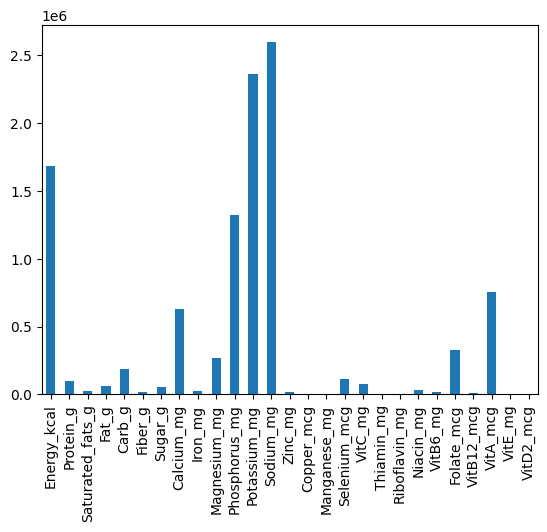

In [15]:
missing_columns = [col for col in nutr if col not in df.columns]
if missing_columns:
    print(f"Kolom berikut tidak ada dalam DataFrame: {missing_columns}")
else:
    # Pastikan semua kolom berisi data numerik
    for col in nutr:
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"Kolom {col} bukan tipe numerik, mencoba mengonversi.")
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Periksa kembali apakah konversi berhasil
    if df[nutr].select_dtypes(include=[float, int]).shape[1] != len(nutr):
        print("Beberapa kolom masih tidak numerik setelah konversi.")
    else:
        # Plot
        df.loc[:, nutr].sum().plot.bar()
        plt.show()

#Balancing nutrients

In [16]:
low_sod = df.Sodium_mg > 140
df.drop(df.loc[low_sod].index, inplace=True)
high_pot = df.Potassium_mg >= 150
df.drop(df.loc[high_pot].index, inplace=True)

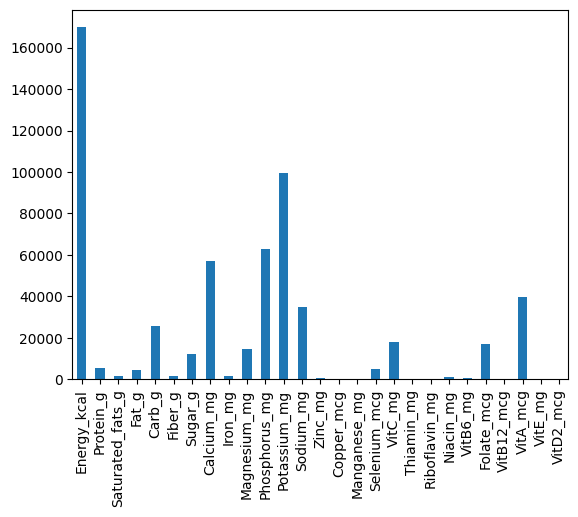

In [17]:
df.loc[:, nutr].sum().plot.bar()
plt.show()
plt.show()

In [18]:
df.drop(['NDB_No'], axis=1, inplace=True)
df

,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,Iron_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
35,cheese ricotta whole milk,174.000,11.26,8.295,12.98,3.04,0.0,0.27,207.00,0.38,...,0.0,0.013,0.195,0.104,0.043,12.0,0.34,120.0,0.11,0.2
36,cheese ricotta part skim milk,138.000,11.39,4.927,7.91,5.14,0.0,0.31,272.00,0.44,...,0.0,0.021,0.185,0.078,0.020,13.0,0.29,107.0,0.07,0.1
48,cream fluid half and half,123.000,3.13,7.032,10.39,4.73,0.0,4.13,107.00,0.05,...,0.9,0.030,0.194,0.109,0.050,3.0,0.19,97.0,0.25,0.0
49,cream fluid lt (coffee crm or table crm),191.000,2.96,10.176,19.10,2.82,0.0,3.67,91.00,0.05,...,0.8,0.023,0.190,0.090,0.044,2.0,0.14,181.0,0.12,1.1
50,cream fluid lt whipping,292.000,2.17,19.337,30.91,2.96,0.0,2.96,69.00,0.03,...,0.6,0.024,0.125,0.042,0.028,4.0,0.20,279.0,0.88,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,oyster,60.228,9.51,1.087,2.44,0.00,0.0,0.00,126.00,0.90,...,0.0,0.060,0.070,0.710,145.000,1612.0,0.00,0.0,1.11,0.0
9300,tiger prawns orange,64.530,14.25,0.177,0.74,0.00,0.0,0.00,71.89,0.39,...,0.0,0.030,0.030,1.180,112.000,807.0,0.00,0.0,2.87,0.0
9305,squid hard shell,76.480,16.82,0.227,0.93,0.00,0.0,0.00,8.73,0.62,...,0.0,0.020,0.020,0.650,41.500,622.0,0.00,0.0,0.55,0.0
9306,squid red,78.631,16.25,0.448,1.44,0.00,0.0,0.00,14.15,0.26,...,0.0,0.030,0.020,0.710,101.000,1300.0,0.00,0.0,0.47,0.0


#User content dataset

In [19]:
user_df = pd.read_csv('https://raw.githubusercontent.com/saskiaapm/StuntZilla/main/Dataset/data_anak%20(2).csv')
user_df

,Gender,Age,Birth_Weight,Birth_Length,Body_Weight,Body_Length,Breastfeeding,Stunting,IMT,Energy_kcal,Protein_g
0,0,17,3.0,49,10.0,72.2,0,0,19.183401,810.0,2.9250
1,1,11,2.9,49,2.9,65.0,0,1,6.863905,180.1,2.3925
2,0,16,2.9,49,8.5,72.2,0,1,16.305891,676.5,2.8125
3,0,31,2.8,49,6.4,63.0,0,1,16.124969,489.6,2.6550
4,0,15,3.1,49,10.5,49.0,0,1,43.731778,854.5,2.9625
...,...,...,...,...,...,...,...,...,...,...,...
7568,0,11,2.8,48,10.5,73.5,0,0,19.436346,856.5,2.9625
7569,0,15,2.8,49,2.9,71.0,0,1,5.752827,178.1,2.3925
7570,1,12,2.8,48,7.7,63.0,0,0,19.400353,607.3,2.7525
7571,0,16,2.8,49,7.7,49.0,0,0,32.069971,605.3,2.7525


In [20]:
y = user_df.Energy_kcal
y = y.to_numpy()
user_df = user_df.drop('Energy_kcal', axis=1)

In [21]:
food_df = df.reset_index().rename({'index':'food_id'}, axis=1)
print(food_df)

      food_id                                   Descrip  Energy_kcal  \
0          35                 cheese ricotta whole milk      174.000   
1          36             cheese ricotta part skim milk      138.000   
2          48                 cream fluid half and half      123.000   
3          49  cream fluid lt (coffee crm or table crm)      191.000   
4          50                   cream fluid lt whipping      292.000   
...       ...                                       ...          ...   
1442     9298                                    oyster       60.228   
1443     9300                     tiger prawns  orange        64.530   
1444     9305                        squid  hard shell        76.480   
1445     9306                               squid  red        78.631   
1446     9317                              tiger prawns       67.876   

      Protein_g  Saturated_fats_g  Fat_g  Carb_g  Fiber_g  Sugar_g  \
0         11.26             8.295  12.98    3.04      0.0     0.2

In [22]:
food_df = food_df.to_numpy()
user_df = user_df.to_numpy()

In [23]:
item_train = food_df[:, 2:]
user_train = user_df[:, 4:]
y_train = y

In [24]:
# scale training data
item_train_unscaled = item_train
user_train_unscaled = user_train
y_train_unscaled    = y_train

scalerItem = StandardScaler()
scalerItem.fit(item_train)
item_train = scalerItem.transform(item_train)

scalerUser = StandardScaler()
scalerUser.fit(user_train)
user_train = scalerUser.transform(user_train)

scalerTarget = MinMaxScaler((-1, 1))
scalerTarget.fit(y_train.reshape(-1, 1))
y_train = scalerTarget.transform(y_train.reshape(-1, 1))

In [25]:
item_train, item_test = train_test_split(item_train, train_size=0.80, shuffle=True, random_state=1)
user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=1)
y_train, y_test       = train_test_split(y_train,    train_size=0.80, shuffle=True, random_state=1)
print(f"food/item training data shape: {item_train.shape}")
print(f"food/item test data shape: {item_test.shape}")

food/item training data shape: (1157, 27)
food/item test data shape: (290, 27)


In [26]:
num_user_features = user_train.shape[1]  # remove userid, rating count and ave rating during training
num_item_features = item_train.shape[1]  # remove movie id at train time

In [27]:
num_outputs = 32
tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_outputs)])

item_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_outputs)])

# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(num_item_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 27)]                 0         []                            
                                                                                                  
 sequential (Sequential)     (None, 32)                   38816     ['input_1[0][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 32)                   44192     ['input_2[0][0]']             
                                                                                              

In [28]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=opt,
              loss=cost_fn)

In [29]:
y = tf.stack(y)
user_train = tf.stack(user_train)
item_train = tf.stack(item_train)

In [30]:
tf.random.set_seed(1)
model.fit([user_train[:1000], item_train[:1000]], y_train[:1000], epochs=100)

Epoch 1/100
32/32 [==============================] - 7s 15ms/step - loss: 0.2986
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 0.2365
Epoch 3/100
32/32 [==============================] - 0s 10ms/step - loss: 0.1909
Epoch 4/100
32/32 [==============================] - 0s 11ms/step - loss: 0.1585
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.1359
Epoch 6/100
32/32 [==============================] - 0s 10ms/step - loss: 0.1200
Epoch 7/100
32/32 [==============================] - 0s 13ms/step - loss: 0.1088
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.1003
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0939
Epoch 10/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0890
Epoch 11/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0851
Epoch 12/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0818
Epoch 13/100
32/32 [===========

In [31]:
len(item_test)

290

In [32]:
model.evaluate([user_test[:290], item_test[:290]], y_test[:290])

10/10 [==============================] - 0s 2ms/step - loss: 0.0816


0.08156455308198929

In [33]:
new_user_id = 5000
new_prot = 111
new_calc = 1000

user_vecs = np.array([[new_user_id, new_prot, new_calc, 0, 0, 0],
                      [new_user_id+6, new_prot+4, new_calc+2, 0, 0, 0]])
user_vecs
suser_vecs = scalerUser.transform(user_vecs)

In [34]:
#Assuming 'food_id' is the first column and 'Descrip' is the second column
columns_to_drop = [0, 1]
item_vecs = np.delete(food_df, columns_to_drop, axis=1)

In [35]:
y_p = model.predict([suser_vecs, item_train[:2]])
y_pu = scalerTarget.inverse_transform(y_p)
sorted_index = np.argsort(-y_pu,axis=0).reshape(-1).tolist()  #negate to get largest rating first
sorted_ypu   = y_pu[sorted_index]
sorted_items = item_train[sorted_index]  #using unscaled vectors for display

1/1 [==============================] - 0s 140ms/step


In [36]:
sorted_items

<tf.Tensor: shape=(), dtype=float64, numpy=-0.38913007656464427>

In [37]:
# Skala vektor pengguna dan item
suser_vecs = scalerUser.transform(user_vecs)
sitem_vecs = scalerItem.transform(item_vecs)

# Ulangi vektor pengguna dan item sehingga memiliki jumlah sampel yang sama
num_items = sitem_vecs.shape[0]
suser_vecs_repeated = np.repeat(suser_vecs, num_items, axis=0)
sitem_vecs_tiled = np.tile(sitem_vecs, (suser_vecs.shape[0], 1))

# Prediksi dengan model
y_p = model.predict([suser_vecs_repeated, sitem_vecs_tiled])

# Unscale hasil prediksi
y_pu = scalerTarget.inverse_transform(y_p)

# Urutkan hasil prediksi, prediksi tertinggi terlebih dahulu
sorted_index = np.argsort(-y_pu, axis=0).reshape(-1).tolist()
sorted_index_filtered = [idx for idx in sorted_index if idx < len(item_vecs)]
sorted_ypu   = y_pu[sorted_index_filtered]
sorted_items = item_vecs[sorted_index_filtered]

# Cetak hasil untuk verifikasi
print("Sorted Predictions:", sorted_ypu)
print("Sorted Items:", sorted_items)

91/91 [==============================] - 0s 2ms/step
Sorted Predictions: [[794.6127 ]
 [764.33923]
 [763.1864 ]
 ...
 [539.18976]
 [530.8625 ]
 [502.04636]]
Sorted Items: [[43.0 3.81 0.767 ... 20.0 0.0 0.0]
 [5.0 0.25 0.0 ... 0.0 0.0 0.0]
 [5.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [326.0 10.8 0.0 ... 0.0 0.0 0.0]
 [270.0 18.82 2.918 ... 1.0 0.04 0.0]
 [370.0 10.5 0.238 ... 0.0 0.11 0.0]]


In [38]:
print(len(item_vecs))

1447


In [39]:
# Skala vektor pengguna dan item
suser_vecs = scalerUser.transform(user_vecs)
sitem_vecs = scalerItem.transform(item_vecs)

# Ulangi vektor pengguna dan item sehingga memiliki jumlah sampel yang sama
num_items = sitem_vecs.shape[0]
suser_vecs_repeated = np.repeat(suser_vecs, num_items, axis=0)
sitem_vecs_tiled = np.tile(sitem_vecs, (suser_vecs.shape[0], 1))

# Prediksi dengan model
y_p = model.predict([suser_vecs_repeated, sitem_vecs_tiled])

# Unscale hasil prediksi
y_pu = scalerTarget.inverse_transform(y_p)

# Urutkan hasil prediksi, prediksi tertinggi terlebih dahulu
sorted_index = np.argsort(-y_pu, axis=0).reshape(-1).tolist()

# Saring indeks agar tidak melebihi panjang vektor item
num_items_filtered = min(len(item_vecs), len(sorted_index))
sorted_index_filtered = sorted_index[:num_items_filtered]

sorted_ypu = y_pu[sorted_index_filtered]

# Saring juga vektor item agar panjangnya sesuai dengan indeks yang valid
sorted_items = item_vecs[:num_items_filtered]

# Cetak hasil untuk verifikasi
print("Sorted Predictions:", sorted_ypu)
print("Sorted Items:", sorted_items)


91/91 [==============================] - 0s 2ms/step
Sorted Predictions: [[794.64996]
 [794.6127 ]
 [764.3708 ]
 ...
 [643.55914]
 [643.54254]
 [643.281  ]]
Sorted Items: [[174.0 11.26 8.295 ... 120.0 0.11 0.2]
 [138.0 11.39 4.927 ... 107.0 0.07 0.1]
 [123.0 3.13 7.032 ... 97.0 0.25 0.0]
 ...
 [76.48 16.82 0.2269999999999999 ... 0.0 0.55 0.0]
 [78.631 16.25 0.4479999999999999 ... 0.0 0.47 0.0]
 [67.876 14.24 0.134 ... 0.0 1.65 0.0]]


In [40]:
# Saving model
model.save("model_rekomendasi_gizi.h5")

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("model_rekomendasi_gizi.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#tflite

In [41]:
print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.15.0


In [42]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

In [43]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [44]:
import pathlib
tflite_model_file = pathlib.Path('model_rekomendasi_gizi.tflite')
tflite_model_file.write_bytes(tflite_model)

337272

In [45]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [46]:
# Assume input_shape1 and input_shape2 are the shapes of the two inputs expected by the model
input_shape1 = input_details[0]['shape']
input_shape2 = input_details[1]['shape']

inputs, outputs = [], []
for _ in range(100):
    input_data1 = np.array(np.random.random_sample(input_shape1), dtype=np.float32)
    input_data2 = np.array(np.random.random_sample(input_shape2), dtype=np.float32)

    # Set the tensor for both inputs for the TFLite interpreter
    interpreter.set_tensor(input_details[0]['index'], input_data1)
    interpreter.set_tensor(input_details[1]['index'], input_data2)

    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])

    # Test the TensorFlow model on random input data.
    tf_results = model([tf.constant(input_data1), tf.constant(input_data2)])
    output_data = np.array(tf_results)

    inputs.append((input_data1[0][0], input_data2[0][0]))  # Store both inputs
    outputs.append(output_data[0][0])

In [47]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>